In [1]:
import os

In [2]:
os.chdir("C:\\upskill\\dataset_agriculture")

In [3]:
os.getcwd

<function nt.getcwd()>

In [4]:
!pip install cufflinks
!pip install chart-studio
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import cufflinks as cs
%matplotlib inline
import chart_studio as cs
import plotly 
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
plotly.offline.init_notebook_mode(connected=True)

In [7]:
df1 = pd.read_csv('datafile (1).csv') 
df2 = pd.read_csv('datafile (2).csv') 
df3 = pd.read_csv('datafile (3).csv') 
df4 = pd.read_csv('datafile.csv') 
df5 = pd.read_csv('produce.csv')

In [8]:
df1.sample(10)

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
47,WHEAT,Uttar Pradesh,18979.38,31902.74,769.84,34.99
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
32,PADDY,West Bengal,24731.06,33046.12,731.25,39.04
42,SUGARCANE,Andhra Pradesh,56621.16,91442.63,119.72,757.92
10,GRAM,Rajasthan,8552.69,12610.85,1691.66,6.83
38,RAPESEED AND MUSTARD,Gujarat,13740.64,19083.55,1610.40,11.61
45,WHEAT,Madhya Pradesh,12464.40,22489.75,810.25,23.59
39,RAPESEED AND MUSTARD,Haryana,14715.27,27507.54,1251.12,19.94
44,SUGARCANE,Tamil Nadu,66335.06,89025.27,85.79,1015.45
20,MAIZE,Bihar,13513.92,19857.70,404.43,42.95


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [10]:
df2.columns

Index(['Crop             ', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')

In [11]:
df2_pd=df2
df2_pd.rename(columns={'Crop             ':'Crop'},inplace=True)
df2.columns

Index(['Crop', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')

In [12]:
df2['Crop']

0              Total Foodgrains
1                          Rice
2                         Wheat
3                         Jowar
4                         Bajra
5                         Maize
6                          Ragi
7                 Small millets
8                        Barley
9                Coarse Cereals
10                      Cereals
11                         Gram
12                        Arhar
13                 Other Pulses
14                 Total Pulses
15       Total Non-Food grains 
16               Total Oilseeds
17                    Groundnut
18                      Sesamum
19            Rapeseed &Mustard
20                      Linseed
21                  Castor seed
22                    Safflower
23                   Niger seed
24                    Sunflower
25                     Soyabean
26                Nine Oilseeds
27                      Coconut
28                  Cotton seed
29                 Total Fibers
30                 Cotton(lint)
31      

In [13]:
mask = df2['Crop'].str.contains('Total', case=False)

# Filter out rows where "Total" is present in the "Crops" column
df2 = df2[~mask]

# Display the resulting DataFrame without the rows containing "Total"
df2

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8
5,Maize,198.8,249.6,259.8,220.1,286.0,156.1,160.5,161.6,163.4,169.1,127.3,155.5,160.7,134.7,169.1
6,Ragi,56.1,83.6,79.3,73.4,85.2,60.2,70.9,70.6,64.8,65.8,93.2,117.9,112.2,113.2,129.6
7,Small millets,53.9,61.9,50.0,42.9,82.0,50.9,52.3,45.6,41.8,45.0,106.0,118.3,109.7,102.7,182.4
8,Barley,88.1,79.3,112.0,89.9,110.3,72.8,67.9,79.5,70.2,79.4,121.0,116.9,141.0,127.9,138.9
9,Coarse Cereals,138.5,166.4,163.5,137.0,178.4,106.4,105.6,101.8,102.6,105.4,130.1,157.6,160.7,133.5,169.2
10,Cereals,164.1,174.6,177.7,164.4,183.1,130.0,129.9,130.3,126.8,129.8,126.3,134.4,136.4,129.7,141.1


In [14]:
df3.sample(10)

,Crop,Variety,Season/ duration in days,Recommended Zone,Unnamed: 4
39,Linseed,JLS-67 (Shival),114,"Bundelkhand part of Uttar Pradesh, Madhya Prad...",NaN
60,Horse Gram,CRIDALATHA (CRHG-4),110,South India under rainfed conditions.,NaN
35,Indian Mustard,Pusa Mustard 26 (NPJ-113),NaN,"Plains of Jammu & Kashmir, Punjab, Haryana, Ra...",NaN
43,Groundnut,Kadiri Harithandhra (K 1319),122,Karnataka and Maharashtra under timely sown ir...,NaN
26,Pearl Millet,Nandi-65 (MH-1549),80,"Rajasthan, Gujarat, Haryana, MP, UP, Punjab an...",NaN
64,Napier Bajra Hybrid,Phule Jaywant (RBN-13),NaN,"Madhya Pradesh, Maharashtra, Gujarat, Southern...",NaN
14,Wheat,Pusa Prachi (HI 1563),NaN,"Eastern Uttar Pradesh, Bihar, Jharkhand, West ...",NaN
67,Oat,JO 03-91 (SC),NaN,"Madhya Pradesh, Chhattisgarh, Bundelkhand regi...",NaN
10,Wheat,PDW 314,169,"Punjab, Haryana, Western Uttar Pradesh, Delhi,...",NaN
52,Fieldpea,GOMATI (TRCP-8),140,"Uttarakhand Hills, Jammu & Kashmir and North E...",NaN


In [15]:
df4.head(16)

,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0
5,Fruits,100.0,99.0,99.0,98.0,102.0,104.0,114.0,119.0
6,Milk,100.0,97.0,98.0,98.0,98.0,112.0,123.0,124.0
7,"Eggs, Fish and Meat",100.0,102.0,101.0,100.0,99.0,116.0,133.0,137.0
8,Oilseeds,100.0,86.0,85.0,97.0,104.0,103.0,99.0,102.0
9,Sugarcane,100.0,96.0,91.0,87.0,80.0,81.0,109.0,107.0


In [16]:
df5.sample(10)

,Particulars,Frequency,Unit,3-1993,3-1994,3-1995,3-1996,3-1997,3-1998,3-1999,...,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013,3-2014
393,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",Ton th,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5977.000,6564.0000,5055.0000,6943.0000,6254.0000,5895.000000,7501.000000,6810.00000,6150.00,NaN
266,Agricultural Production Foodgrains Rice Volume...,"Annual, Ending mar Of Each Year",Ton th,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1169.000,1656.3000,1368.4000,1461.9000,1559.7000,1260.600000,1772.000000,2230.00000,2780.00,NaN
305,Agricultural Production Foodgrains Wheat Area ...,"Annual, Ending mar Of Each Year",ha mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.360,0.3600,0.3600,0.3700,0.3600,0.352500,0.357000,0.36000,0.36,NaN
252,Agricultural Production Foodgrains Rice Area O...,"Annual, Ending mar Of Each Year",ha mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.710,1.7100,1.7100,1.7400,1.7500,1.752100,1.795200,1.80000,1.73,NaN
360,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",ha mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.030,29.0400,28.7100,28.4800,27.4500,27.680000,28.340000,26.42000,24.80,25.5000
173,Agriculture Production Foodgrains Yield Oilsee...,"Annual, Ending mar Of Each Year",kg/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,541.000,548.0000,549.0000,590.0000,623.0000,632.000000,645.000000,676.00000,NaN,NaN
48,Agricultural Production Commercial Crops Mesta,"Annual, Ending mar Of Each Year",Bale mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.873,0.8701,0.9559,0.9904,0.7309,0.587028,0.610752,0.66298,0.59,0.5795
339,Agricultural Production Foodgrains Wheat Volum...,"Annual, Ending mar Of Each Year",Ton th,NaN,NaN,NaN,NaN,0.0,0.1,0.0,...,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,Agriculture Production Foodgrains Production O...,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000,6.2000,6.6700,7.0600,7.2400,7.040000,7.050000,6.89000,NaN,NaN
408,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",Ton th,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3391.800,2971.2000,3084.4000,3058.9000,3080.2000,2968.800000,3216.600000,3570.00000,3690.00,NaN


In [17]:
df1.isna().sum()

Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64

In [18]:
df2.isna().sum()

Crop                  0
Production 2006-07    0
Production 2007-08    0
Production 2008-09    0
Production 2009-10    0
Production 2010-11    0
Area 2006-07          0
Area 2007-08          0
Area 2008-09          0
Area 2009-10          0
Area 2010-11          0
Yield 2006-07         0
Yield 2007-08         0
Yield 2008-09         0
Yield 2009-10         0
Yield 2010-11         0
dtype: int64

In [19]:
df3.isna().sum()

Crop                         0
Variety                      0
Season/ duration in days    28
Recommended Zone             1
Unnamed: 4                  78
dtype: int64

In [20]:
df4.isna().sum()

Crop       1
2004-05    1
2005-06    1
2006-07    1
2007-08    1
2008-09    1
2009-10    1
2010-11    1
2011-12    1
dtype: int64

In [21]:
df5.isna().sum()

Particulars      0
Frequency        0
Unit             0
 3-1993        426
 3-1994        425
 3-1995        425
 3-1996        423
 3-1997        419
 3-1998        419
 3-1999        418
 3-2000        409
 3-2001        407
 3-2002        393
 3-2003        301
 3-2004         68
 3-2005          4
 3-2006          6
 3-2007         11
 3-2008         12
 3-2009         11
 3-2010         26
 3-2011         25
 3-2012         41
 3-2013        131
 3-2014        366
dtype: int64

In [22]:
df5.shape

(429, 25)

In [23]:
df4.dropna(subset=['Crop'],axis=0,inplace =True)

In [24]:
df4

,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0
5,Fruits,100.0,99.0,99.0,98.0,102.0,104.0,114.0,119.0
6,Milk,100.0,97.0,98.0,98.0,98.0,112.0,123.0,124.0
7,"Eggs, Fish and Meat",100.0,102.0,101.0,100.0,99.0,116.0,133.0,137.0
8,Oilseeds,100.0,86.0,85.0,97.0,104.0,103.0,99.0,102.0
9,Sugarcane,100.0,96.0,91.0,87.0,80.0,81.0,109.0,107.0


In [25]:
df4.isna().sum()

Crop       0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
dtype: int64

EDA on the dataset to extract meaning full information

Q1. What was the share of crops in total prodcution in 2011-12 and 2009-10 ?*

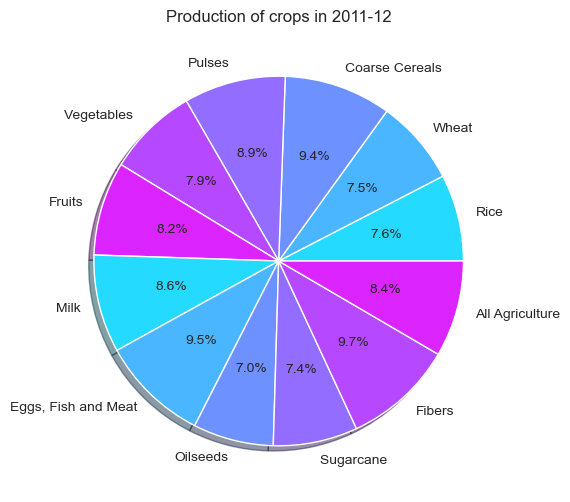

In [28]:
plt.figure(figsize=(12,6))
sns.set_style('white')
color=sns.color_palette('cool')
plt.pie(df4['2011-12'],
        labels=df4['Crop'],
        autopct='%0.1f%%',
        shadow= True,
        colors=color)
plt.title('Production of crops in 2011-12')
plt.show()

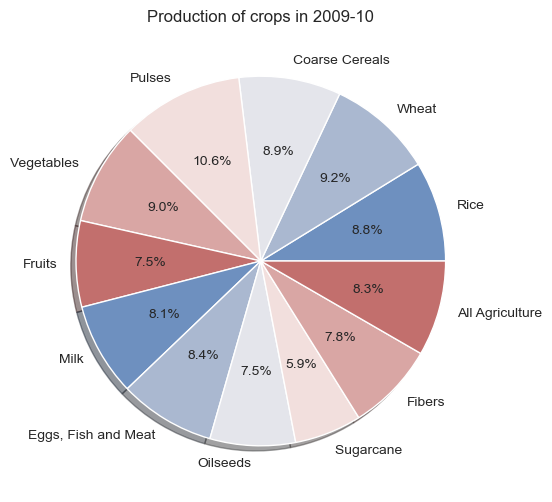

In [29]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
color=sns.color_palette('vlag')
plt.pie(df4['2009-10'],
        labels=df4['Crop'],
        autopct='%0.1f%%',
        shadow= True,
        colors=color)
plt.title('Production of crops in 2009-10')
plt.show()

Q2. Which crops have different kinds of vareities and who has the most varieties in all these crops?*

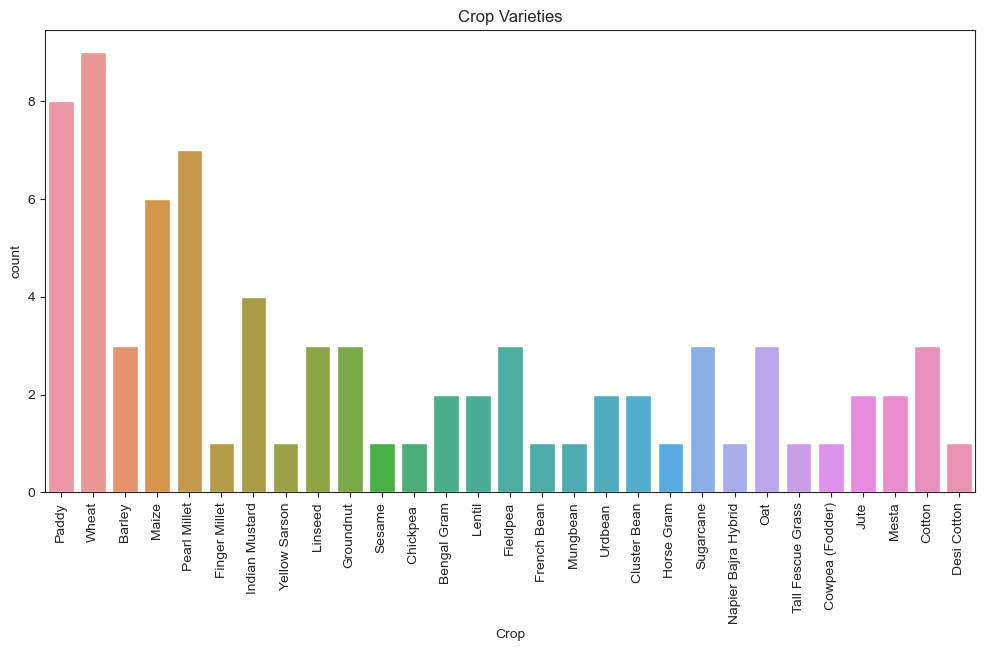

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x=df3['Crop'],data=df3)
plt.xticks(rotation='vertical')
plt.xlabel('Crop')
plt.ylabel('count')
plt.title('Crop Varieties')
plt.show()

Q3. What are the different crops and their yield in the year 2010-11?

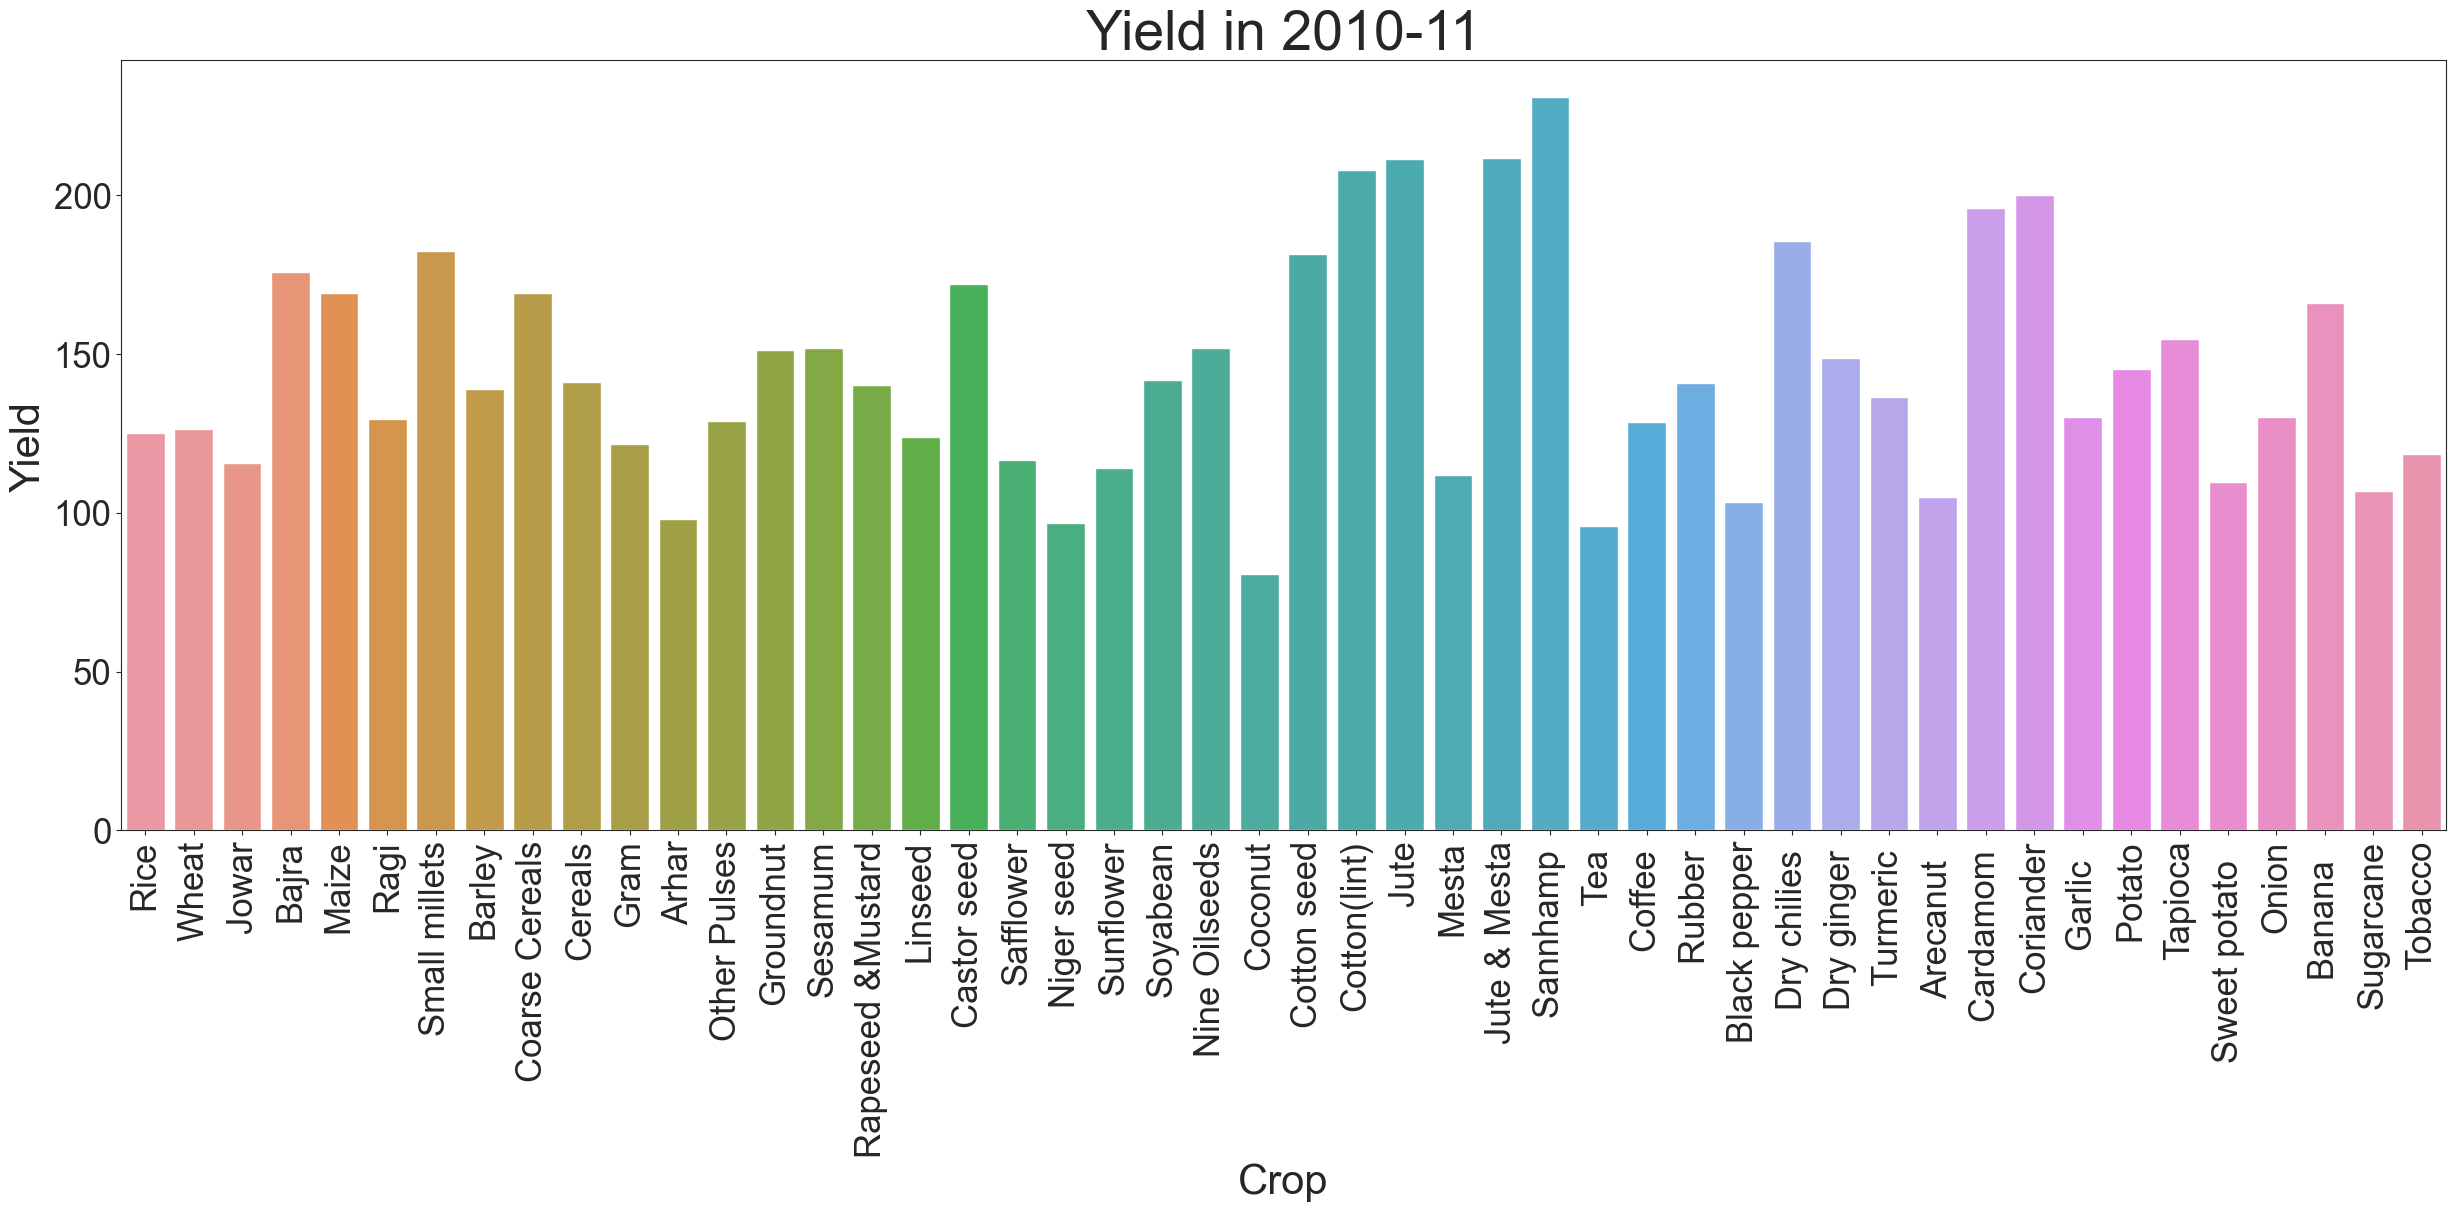

In [31]:
plt.figure(figsize=(30,10))
sns.barplot(x=df2['Crop'],y=df2['Yield 2010-11'],data=df2)
plt.xticks(rotation='vertical',fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Crop',fontsize=30)
plt.ylabel('Yield',fontsize=30)
plt.title('Yield in 2010-11',fontsize=40)
plt.show()

In [32]:
top_3_crops = df2.nlargest(3, 'Yield 2010-11')['Crop']
print(top_3_crops)

34       Sannhamp 
33    Jute & Mesta
31            Jute
Name: Crop, dtype: object


Q4. What costs does one bear if they decide to grow a particular crop in their farm?

C:\Users\ayush\AppData\Local\Temp\ipykernel_6940\3328239513.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\ayush\AppData\Local\Temp\ipykernel_6940\3328239513.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: xlabel='Crop'>

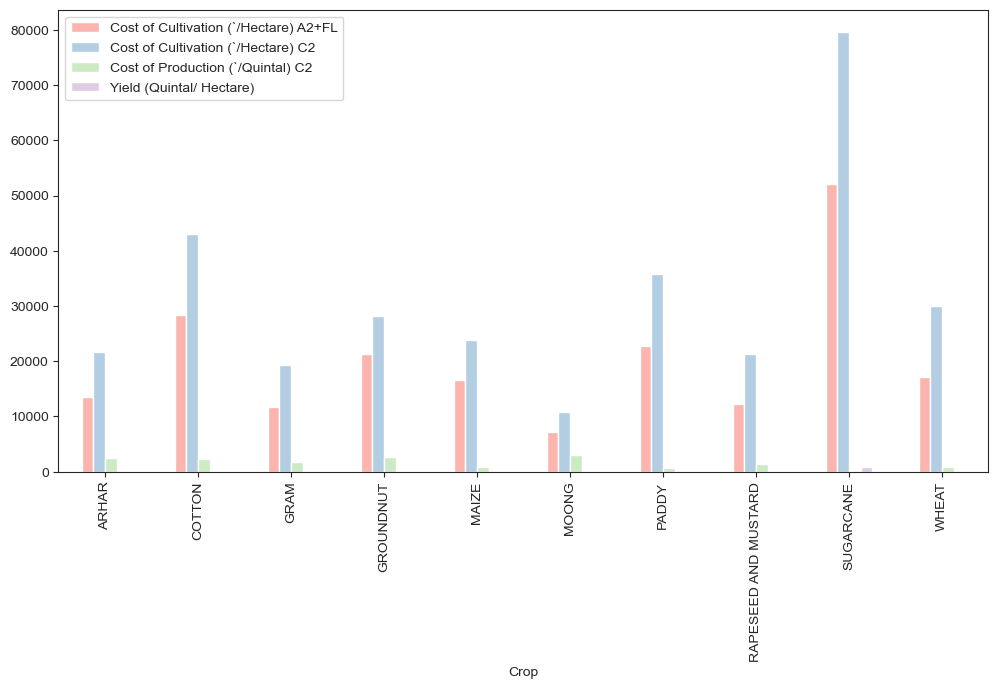

In [35]:
s=df1.groupby('Crop')
s.mean()
cols=df1.columns
cols
color=sns.color_palette('Pastel1')
df1.groupby('Crop')[cols].mean().plot(kind='bar', figsize=(12,6),color=color)

Q5. What is share of states in total yeild of crops?

In [36]:
fig=px.pie(df1,values=df1.groupby('State')[cols[-1]].sum(),names=df1.groupby('State')[cols[-1]],
           title='State wise yeild(Quintal/Hectare) ')
fig.show()

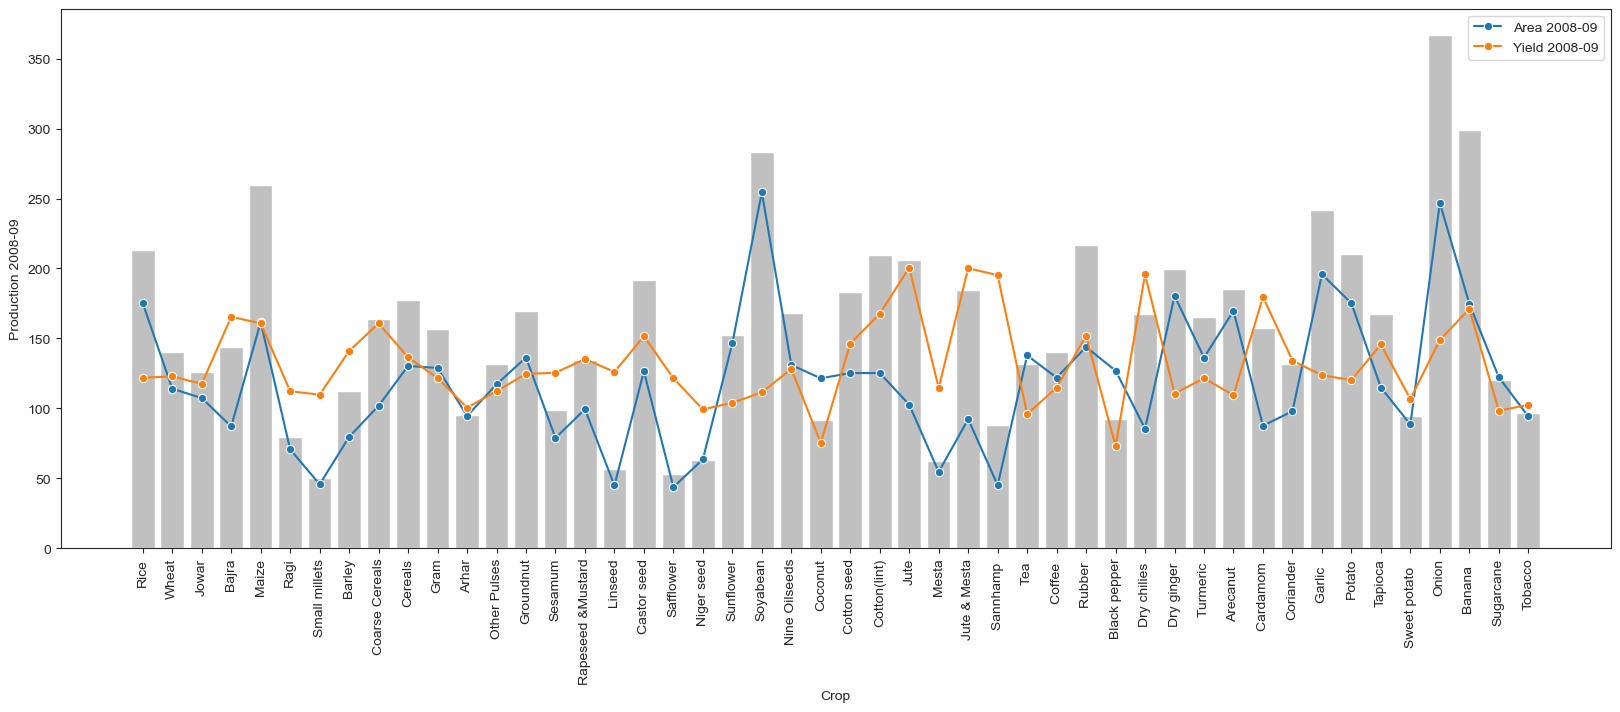

In [37]:
plt.figure(figsize=(20,7))
sns.barplot(data=df2,x="Crop",y="Production 2008-09",color='silver')
sns.lineplot(data=df2,x="Crop",y="Area 2008-09",marker='o',label='Area 2008-09')
sns.lineplot(data=df2,x="Crop",y="Yield 2008-09",marker='o',label='Yield 2008-09')
plt.xticks(rotation=90)
plt.show()

Q6. Which crop has the biggest combined production?

In [38]:
t=df2[['Crop','Production 2006-07','Production 2007-08','Production 2008-09','Production 2009-10','Production 2010-11']]
t.rename(index=t['Crop'],inplace=True)
t

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11
Rice,Rice,200.8,207.9,213.3,191.6,206.4
Wheat,Wheat,131.6,136.4,140.1,140.3,150.8
Jowar,Jowar,124.3,137.8,126.0,116.5,121.8
Bajra,Bajra,136.4,161.5,143.9,105.4,167.9
Maize,Maize,198.8,249.6,259.8,220.1,286.0
Ragi,Ragi,56.1,83.6,79.3,73.4,85.2
Small millets,Small millets,53.9,61.9,50.0,42.9,82.0
Barley,Barley,88.1,79.3,112.0,89.9,110.3
Coarse Cereals,Coarse Cereals,138.5,166.4,163.5,137.0,178.4
Cereals,Cereals,164.1,174.6,177.7,164.4,183.1


C:\Users\ayush\AppData\Local\Temp\ipykernel_6940\2816694547.py:1: UserWarning:

'color' and 'colormap' cannot be used simultaneously. Using 'color'



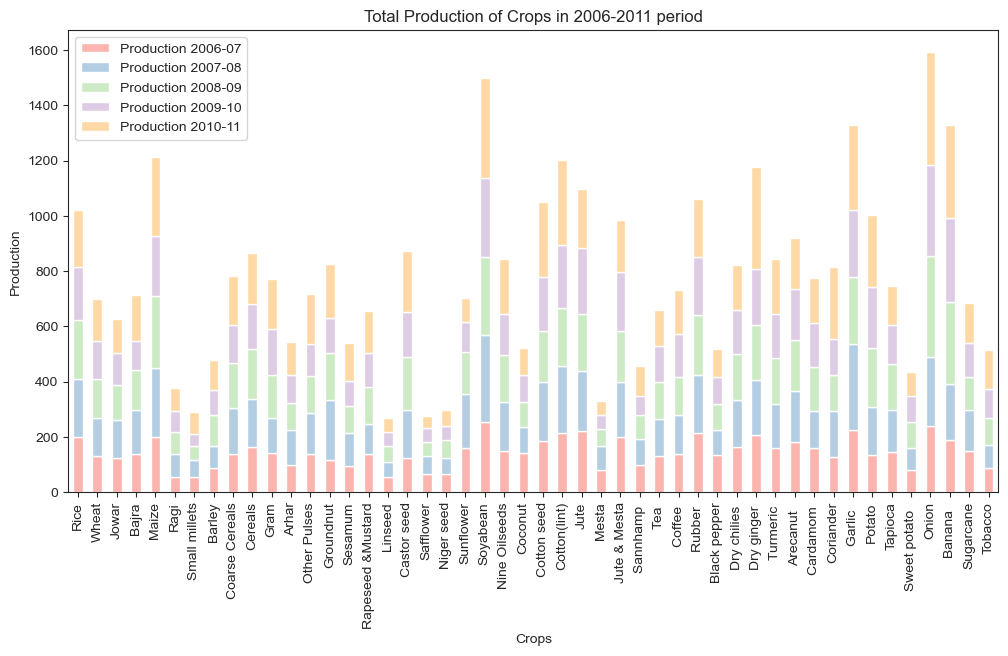

In [39]:
t.plot(kind='bar',stacked= True,figsize=(12,6),color=sns.color_palette('Pastel1'),cmap=True)
plt.title('Total Production of Crops in 2006-2011 period')
plt.xlabel('Crops')
plt.ylabel('Production')
plt.xticks(fontsize=10)
plt.show()

In [40]:
e=df1.groupby(['Crop','State'])['Yield (Quintal/ Hectare) '].sum()
e=pd.DataFrame(e)
e

Yield (Quintal/ Hectare) 
Crop                 State                                    
ARHAR                Andhra Pradesh                       6.42
                     Gujarat                              9.59
                     Karnataka                            7.47
                     Maharashtra                          8.72
                     Uttar Pradesh                        9.83
COTTON               Andhra Pradesh                      17.83
                     Gujarat                             19.05
                     Haryana                             19.90
                     Maharashtra                         12.69
                     Punjab                              24.39
GRAM                 Andhra Pradesh                      16.69
                     Madhya Pradesh                      10.29
                     Maharashtra                          8.05
                     Rajasthan                            6.83
                     Uttar Pradesh                       10.93
GROUNDNUT            Andhra Pradesh                      11.97
                     Gujarat                             13.45
                     Karnataka                            4.71
                     Maharashtra                          9.33
                     Tamil Nadu                          11.98
MAIZE                Andhra Pradesh                      42.68
                     Bihar                               42.95
                     Karnataka                           31.10
                     Rajasthan                           23.56
                     Uttar Pradesh                       13.70
MOONG                Andhra Pradesh                       5.90
                     Karnataka                            1.32
                     Maharashtra                          6.70
                     Orissa                               3.01
                     Rajasthan                            4.05
PADDY                Andhra Pradesh                      56.00
                     Orissa                              32.42
                     Punjab                              67.41
                     Uttar Pradesh                       36.61
                     West Bengal                         39.04
RAPESEED AND MUSTARD Gujarat                             11.61
                     Haryana                             19.94
                     Madhya Pradesh                      12.94
                     Rajasthan                           13.54
                     Uttar Pradesh                       13.57
SUGARCANE            Andhra Pradesh                     757.92
                     Karnataka                          986.21
                     Maharashtra                        744.01
                     Tamil Nadu                        1015.45
                     Uttar Pradesh                      448.89
WHEAT                Madhya Pradesh                      23.59
                     Punjab                              39.83
                     Rajasthan                           37.19
                     Uttar Pradesh                       34.99

Q7. What is the states' best yield capacity crop?

In [41]:
plt.figure(figsize=(12,6))
pie=px.sunburst(df1,path=['State','Crop'],values='Yield (Quintal/ Hectare) ',
              hover_data=['Yield (Quintal/ Hectare) '])
pie.show()

<Figure size 1200x600 with 0 Axes>

Q8. What is the crop production in the time frame of 2004-2012?

In [42]:
df4=df4.transpose()
df4.rename(columns=df4.iloc[0],inplace= True)
df4=df4[1:]
df4

,Rice,Wheat,Coarse Cereals,Pulses,Vegetables,Fruits,Milk,"Eggs, Fish and Meat",Oilseeds,Sugarcane,Fibers,All Agriculture
2004-05,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2005-06,101.0,101.0,107.0,108.0,109.0,99.0,97.0,102.0,86.0,96.0,92.0,99.0
2006-07,99.0,112.0,110.0,134.0,103.0,99.0,98.0,101.0,85.0,91.0,91.0,101.0
2007-08,105.0,115.0,115.0,124.0,118.0,98.0,98.0,100.0,97.0,87.0,96.0,104.0
2008-09,112.0,117.0,113.0,124.0,113.0,102.0,98.0,99.0,104.0,80.0,109.0,106.0
2009-10,121.0,127.0,123.0,146.0,124.0,104.0,112.0,116.0,103.0,81.0,107.0,115.0
2010-11,117.0,120.0,122.0,137.0,128.0,114.0,123.0,133.0,99.0,109.0,138.0,123.0
2011-12,110.0,108.0,136.0,129.0,115.0,119.0,124.0,137.0,102.0,107.0,140.0,122.0


In [43]:
a=px.line(df4,markers=True)

a.show()


By doing this analysis i feel it has contributed to my knowledge and have some conclusions from the dataset & while we all know how important agriculture is for the nation and still has a lot people relying on agriculture for income . While this dataset offers a lot of data but farming and agriculture is still a declining industry. As much we need agri-products we do not encourage the farmers enough, we do not celebrate them and thus people in the agriculture industry is declining. This industry needs new age solutions so that every farmer earns better and lives a better life which he looks for.